In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


## <font color='purple'><b>Data Preprocessing :

In [10]:
data.head(1).Date, data.tail(1).Date

(0    2012-01-03
 Name: Date, dtype: object,
 2010    2019-12-30
 Name: Date, dtype: object)

In [26]:
from datetime import date
from datetime import datetime

### <font color='magenta'><b>Check for Holidays :

In [35]:
d0 = date(2012,1,3)
d1 = date(2019,12,30)
days = len(pd.date_range((d0),(d1)))
print(f'The number of days from {d0} to {d1} is {days} days')
print()
bdays = len(pd.bdate_range((d0),(d1)))
print(f'The number of business days from {d0} to {d1} is {bdays} days')
print()
print(f'The number of days from {d0} to {d1} in the given time series is {len(data)} days')

The number of days from 2012-01-03 to 2019-12-30 is 2919 days

The number of business days from 2012-01-03 to 2019-12-30 is 2085 days

The number of days from 2012-01-03 to 2019-12-30 in the given time series is 2011 days


<font color='hotpink'><b><I>So the time series contains holidays other than weekends.

### <font color='magenta'><b>Create CustomBusinessDay :

In [36]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

In [37]:
us_cal = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [38]:
my_range = pd.date_range(start='2012-01-03',end='2019-12-30',freq=us_cal)
print(my_range.difference(data.Date))

DatetimeIndex(['2012-04-06', '2012-10-29', '2012-10-30', '2013-03-29',
               '2014-04-18', '2015-04-03', '2016-03-25', '2017-04-14',
               '2018-03-30', '2018-12-05', '2019-04-19'],
              dtype='datetime64[ns]', freq=None)


In [39]:
C = CustomBusinessDay(calendar=USFederalHolidayCalendar(),holidays=['2012-04-06', '2012-10-29', '2012-10-30', 
                                                                    '2013-03-29','2014-04-18', '2015-04-03', 
                                                                    '2016-03-25', '2017-04-14', '2018-03-30', 
                                                                    '2018-12-05', '2019-04-19'])
my_range = pd.date_range(start='2012-01-03',end='2019-12-30',freq=C)
print(my_range.difference(data.Date))

DatetimeIndex([], dtype='datetime64[ns]', freq=None)


<font color='hotpink'><b><I>C is the custom frequency here that includes the holidays other than weekends.

### <font color='magenta'><b>Transform Date to datetime object :

In [51]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [74]:
data.Date = pd.to_datetime(data.Date)
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

### <font color='magenta'><b>Set Date as Index :

In [57]:
df = data.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


<font color='green'><b>Open - <font color='peach'><b><I>The open is the trader's first chance to get a look at what the trading day may hold,ranging, trending, sedate, or volatile.
    
<font color='green'><b>High - <font color='peach'><b><I>Trading day's intraday high price.
    
<font color='green'><b>Low - <font color='peach'><b><I>Trading day's intraday low price.
    
<font color='green'><b>Close - <font color='peach'><b><I>The price at which the share closes at the end of trading hours of the stock market.
    
<font color='green'><b>Adj Close - <font color='peach'><b><I>Stock's closing price after accounting for any corporate actions.
    
<font color='green'><b>Volume - <font color='peach'><b><I>The total number of shares traded in a specified time frame.

<font color='magenta'><b>Considering only the adjusted closing price for the analysis : 

In [76]:
df.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)
df.head()

,Adj Close
Date,
2012-01-03,50.765709
2012-01-04,51.038536
2012-01-05,51.605175
2012-01-06,52.144630
2012-01-09,52.061932


### <font color='magenta'><b>Downsampling the data to Monthly :

<font color='hotpink'><b>  - It reduces the granularity in the data.

In [81]:
df_m = df.resample('M').mean()
df_m.head(),df_m.tail()

(            Adj Close
 Date                 
 2012-01-31  52.907298
 2012-02-29  61.424381
 2012-03-31  71.292448
 2012-04-30  74.810151
 2012-05-31  69.708045,
              Adj Close
 Date                  
 2019-08-31  202.738817
 2019-09-30  215.853332
 2019-10-31  232.974974
 2019-11-30  260.569057
 2019-12-31  273.780717)

### <font color='green'><b>Line plot :

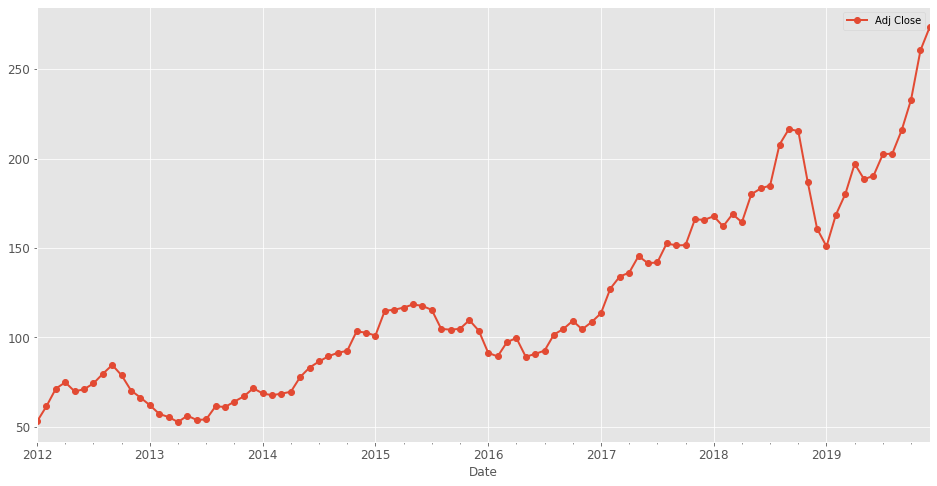

In [89]:
df_m.plot(figsize=(16,8), linewidth=2,marker='o', fontsize=12);

<font color='green'><b>Conditions for Stationarity :
    
<font color='peach'><b> 1) Constant Mean

<font color='peach'><b>2) Constant Variance
     
<font color='peach'><b>3) No Seasonality
    
<font color='maroon'><b><I>From the above line plot, the mean is not constant and the variance is also not constant. Roughly thro the visualization the time series don't seem to have seasonality which is the periodic repeating patterns.

## <font color='purple'><b>Exploratory Data Analysis :

In [163]:
d = df_m.copy()

# Separating month and date into separate column

d["month"] = d.index.strftime("%B") # month extraction
d["year"] = d.index.strftime("%Y") # year extraction
d['Q'] = d.index.quarter    # quarter extraction

# categorizing the quarters
d.loc[d['Q']==1,'quarter']='Q1'
d.loc[d['Q']==2,'quarter']='Q2'
d.loc[d['Q']==3,'quarter']='Q3'
d.loc[d['Q']==4,'quarter']='Q4'

d.head(12)

,Adj Close,month,year,Q,quarter
Date,,,,,
2012-01-31,52.907298,January,2012,1,Q1
2012-02-29,61.424381,February,2012,1,Q1
2012-03-31,71.292448,March,2012,1,Q1
2012-04-30,74.810151,April,2012,2,Q2
2012-05-31,69.708045,May,2012,2,Q2
2012-06-30,70.928848,June,2012,2,Q2
2012-07-31,74.200942,July,2012,3,Q3
2012-08-31,79.595378,August,2012,3,Q3
2012-09-30,84.499841,September,2012,3,Q3


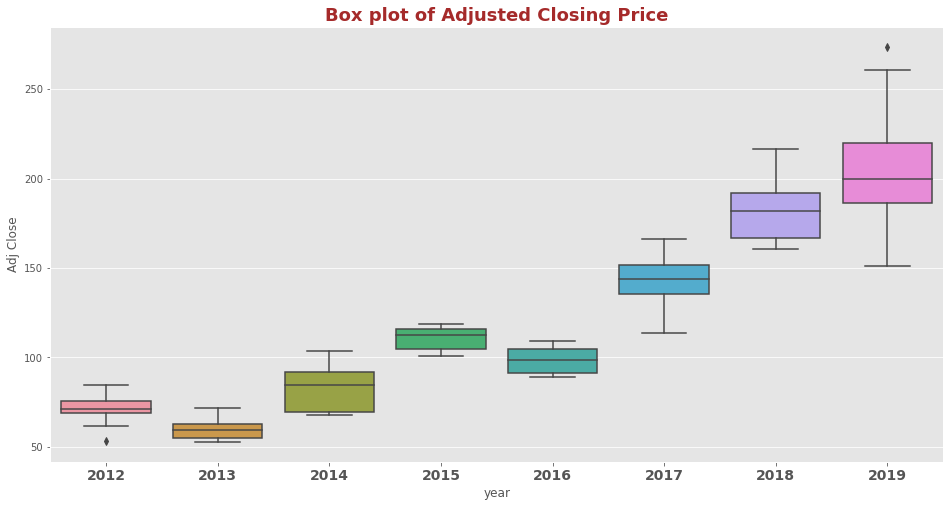

In [207]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=14,fontweight='bold')
sns.boxplot(x="year",y="Adj Close",data=d)
plt.title('Box plot of Adjusted Closing Price',fontweight='bold',fontsize=18,color='brown');

<font color='maroon'><b><I>As seen in the plot the mean is not constant over the years, which proves the time series is not stationary. There is an outlier below lower whisker in the year 2012 which indicates the price was lower than minimum at some instance and there is an outlier on the higher side in the year 2019 which indicates the value of stock had gone up more than the maximum at an instance.

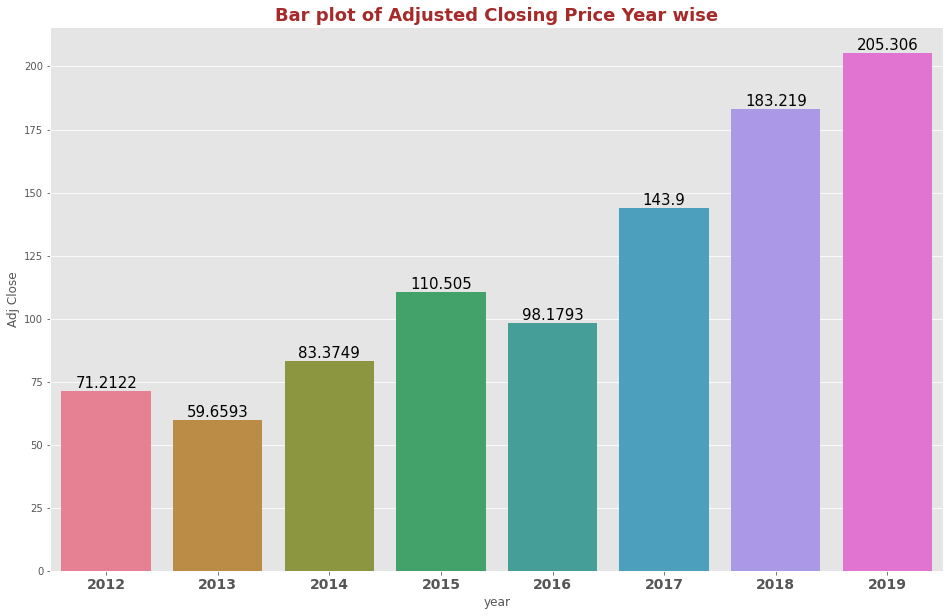

In [206]:
plt.figure(figsize=(16,10))
ax = sns.barplot(data=d,x='year',y='Adj Close',palette='husl',ci=None)
plt.xticks(fontsize=14,fontweight='bold')
plt.title('Bar plot of Adjusted Closing Price Year wise',fontweight='bold',fontsize=18,color='brown');
for i in ax.containers:
    ax.bar_label(i,fontsize=15)

<font color='maroon'><b><I>The bars represent the frequencies of distinct values of stock price. In the above plot, we can see after a few ups and downs from 2012 to 2016 the apple stock price has increased largely since 2017 and overall there is a upward trend.

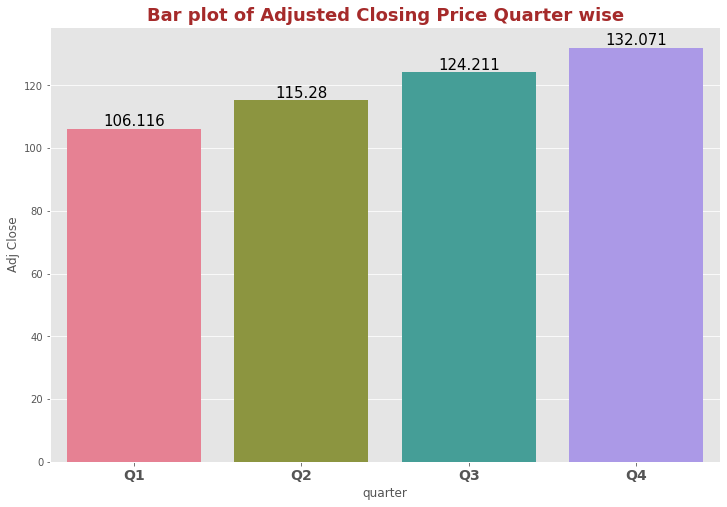

In [205]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=d,x='quarter',y='Adj Close',palette='husl',ci=None)
plt.xticks(fontsize=14,fontweight='bold')
plt.title('Bar plot of Adjusted Closing Price Quarter wise',fontweight='bold',fontsize=18,color='brown');
for i in ax.containers:
    ax.bar_label(i,fontsize=15)

<font color='maroon'><b><I>The quarter plot shows a clear upward trend .

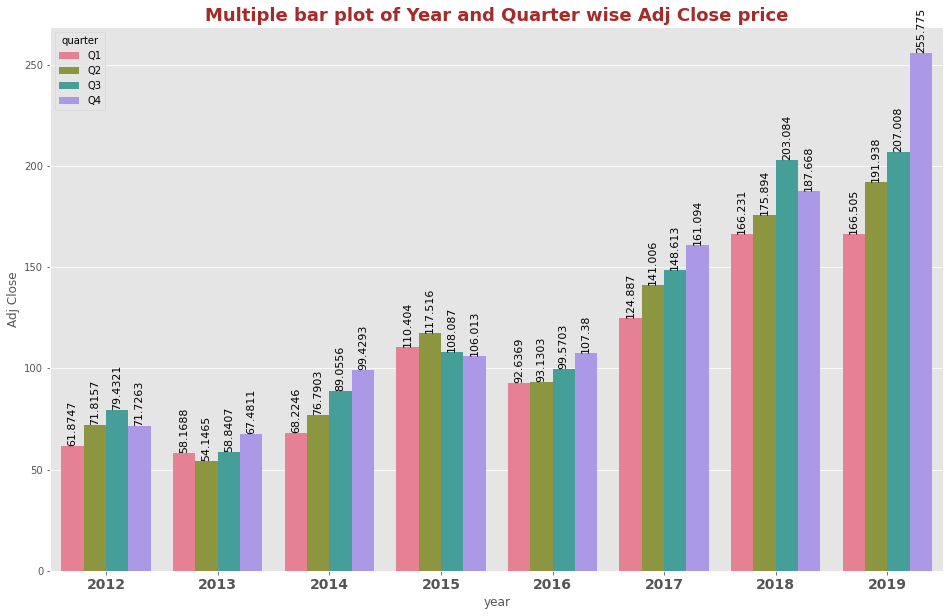

In [208]:
plt.figure(figsize=(16,10))
ax = sns.barplot(data=d,x='year',y='Adj Close',palette='husl',hue='quarter',ci=None)
plt.xticks(fontsize=14,fontweight='bold')
plt.title('Multiple bar plot of Year and Quarter wise Adj Close price',fontweight='bold',fontsize=18,color='brown');
for i in ax.containers:
    ax.bar_label(i,fontsize=11,rotation=90)

<font color='maroon'><b><I>There is a steep increase in the adj closing price of stocks in the last quarter of year 2019 whcih will possibly have greater impact in the prices of the coming year. 

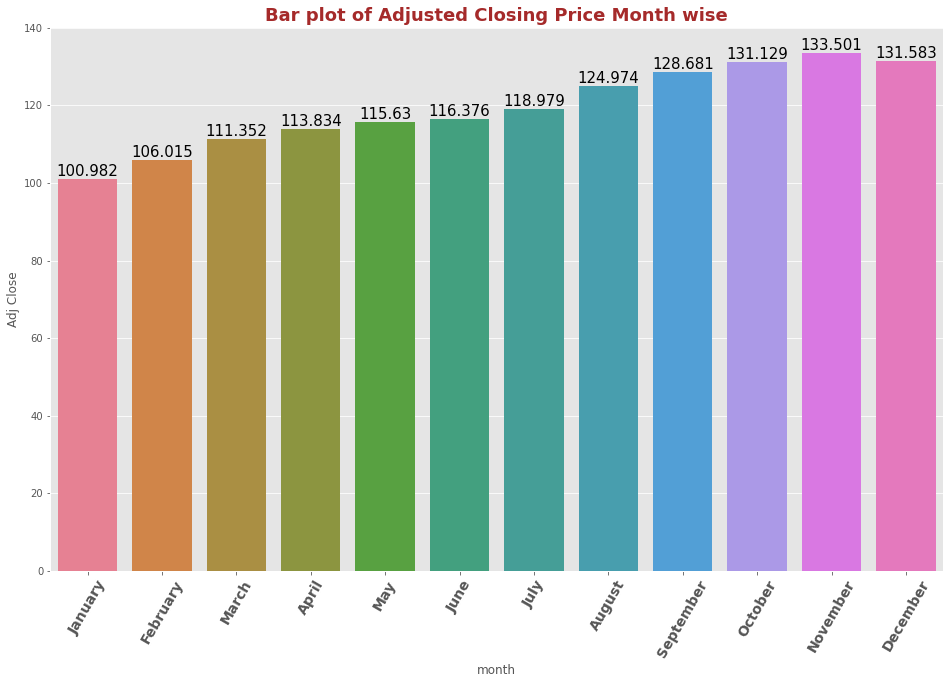

In [209]:
plt.figure(figsize=(16,10))
ax = sns.barplot(data=d,x='month',y='Adj Close',palette='husl',ci=None)
plt.xticks(rotation=60,fontsize=14,fontweight='bold')
plt.title('Bar plot of Adjusted Closing Price Month wise',fontweight='bold',fontsize=18,color='brown');
for i in ax.containers:
    ax.bar_label(i,fontsize=15)

<font color='maroon'><b><I>The adj close price is higher in the month of November followed by December and October. This must be due to soaring of stock price in the last quarter of the year 2019 which we saw above.

In [181]:
d_pivot = d.pivot_table(values='Adj Close', index='year', columns='quarter')
d_pivot

quarter,Q1,Q2,Q3,Q4
year,,,,
2012,61.874709,71.815681,79.432054,71.726256
2013,58.168798,54.146535,58.840726,67.481066
2014,68.224595,76.790276,89.055552,99.429253
2015,110.403772,117.515796,108.086943,106.012857
2016,92.636869,93.130348,99.570289,107.379715
2017,124.887224,141.006372,148.612687,161.094178
2018,166.230645,175.894266,203.084311,187.668381
2019,166.504656,191.938250,207.007753,255.774916


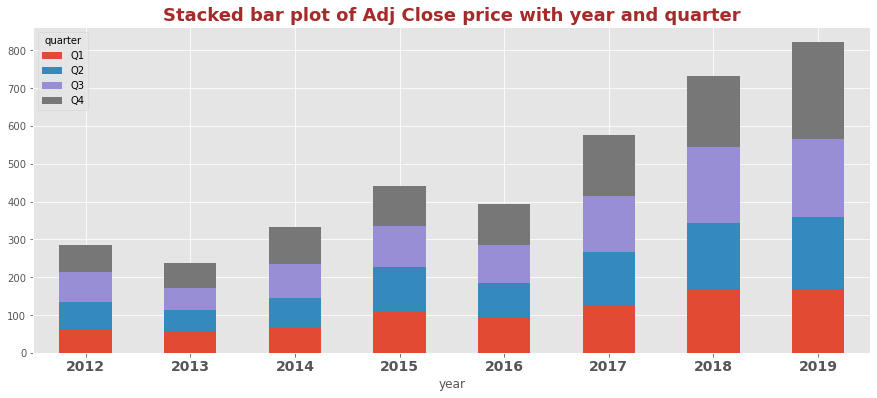

In [210]:
d_pivot.plot(kind='bar',stacked=True,figsize=(15,6))
plt.title('Stacked bar plot of Adj Close price with year and quarter',fontweight='bold',fontsize=18,color='brown')
plt.xticks(rotation=0,fontsize=14,fontweight='bold');

<font color='maroon'><b><I>The plot shows the yearly raising trend of stock price along with the quarters. The year 2013 has the lowest stock price in all quarters. 

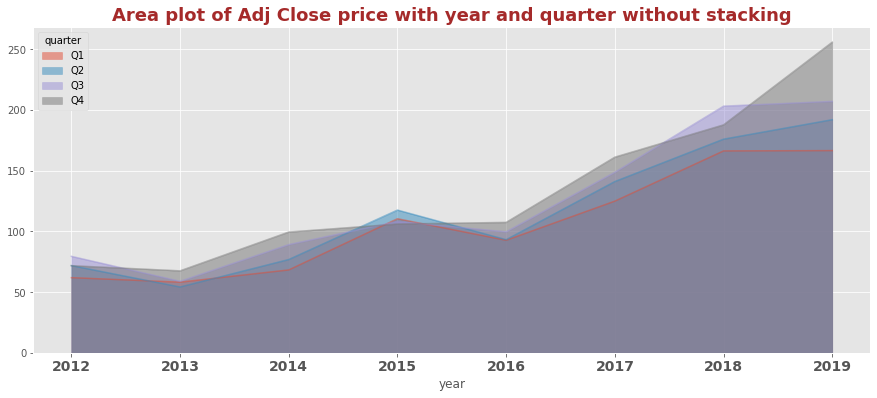

In [211]:
d_pivot.plot(kind='area',stacked=False,figsize=(15,6))
plt.title('Area plot of Adj Close price with year and quarter without stacking',fontweight='bold',fontsize=18,color='brown')
plt.xticks(rotation=0,fontsize=14,fontweight='bold');

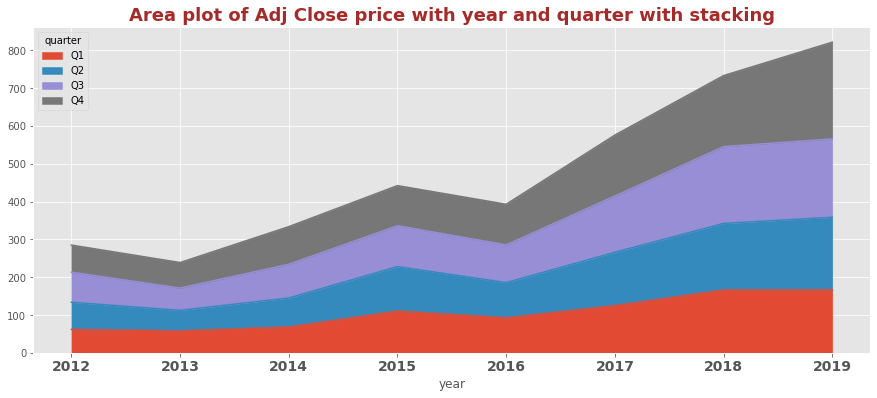

In [212]:
d_pivot.plot(kind='area',stacked=True,figsize=(15,6))
plt.title('Area plot of Adj Close price with year and quarter with stacking',fontweight='bold',fontsize=18,color='brown')
plt.xticks(rotation=0,fontsize=14,fontweight='bold');

<font color='maroon'><b><I>Both the plots show how the last quarter of 2019 has larger area indicating soaring stock price.

In [196]:
d_pivot2 = d.pivot_table(values='Adj Close', index='year', columns='month')
d_pivot2

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2012,74.810151,79.595378,66.264659,61.424381,52.907298,74.200942,70.928848,71.292448,69.708045,70.223182,78.690927,84.499841
2013,52.584215,61.454591,71.453414,57.155541,62.001166,54.116633,53.660243,55.349688,56.195146,66.921334,64.068449,60.950956
2014,69.494316,89.356041,102.577838,67.571447,68.617546,86.453968,83.072271,68.484793,77.804242,103.307512,92.402407,91.356647
2015,116.614644,104.720600,103.690284,114.843638,100.962794,115.302355,117.575884,115.404885,118.356861,109.590705,104.757580,104.237874
2016,99.598819,101.552299,108.472418,89.269278,91.348933,92.523558,90.707725,97.292395,89.084500,104.453936,109.212791,104.635011
2017,136.147133,152.563906,165.699087,127.238253,113.438282,141.887732,141.439831,133.985138,145.432150,165.996497,151.586949,151.386422
2018,164.383479,207.807349,160.725920,162.059499,167.736679,184.913715,183.271643,168.895758,180.027677,186.944749,215.334475,216.531868
2019,197.035945,202.738817,273.780717,168.558006,150.843483,202.431111,190.349968,180.112481,188.428836,260.569057,232.974974,215.853332


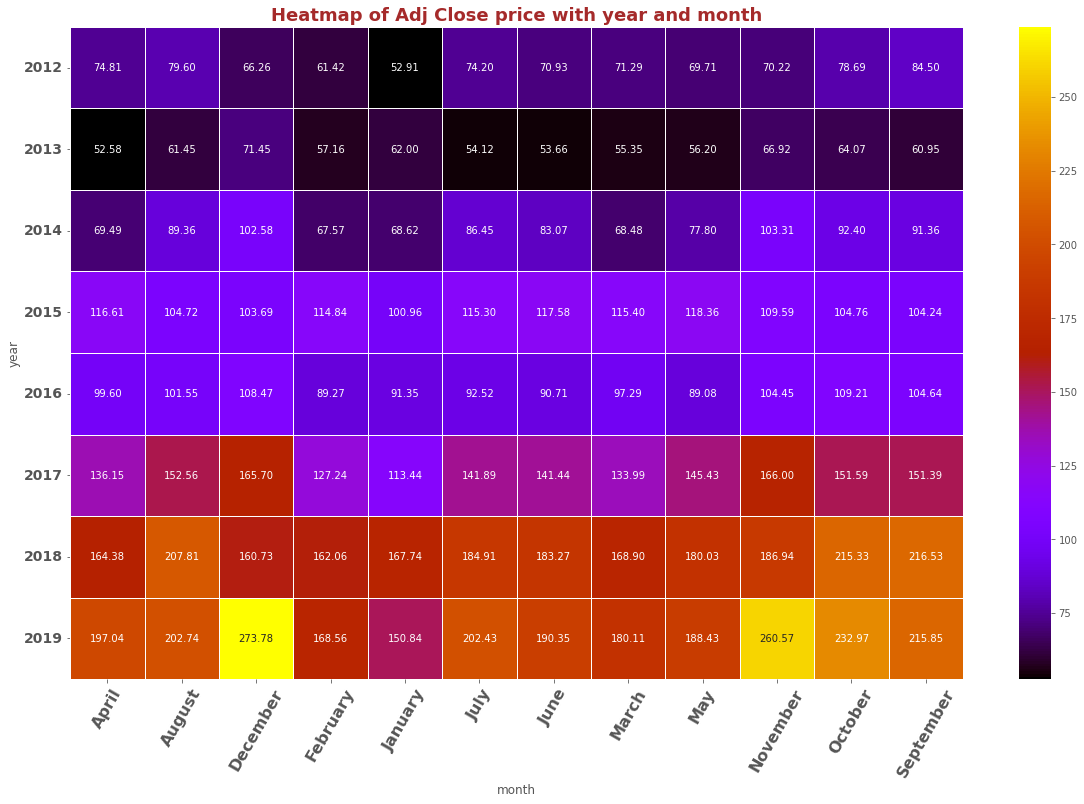

In [213]:
plt.figure(figsize=(20,12))
sns.heatmap(d_pivot2,annot=True,fmt='.2f',cmap='gnuplot',linewidths=1)
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(rotation=0,fontsize=14,fontweight='bold')
plt.title('Heatmap of Adj Close price with year and month',fontweight='bold',fontsize=18,color='brown');

<font color='maroon'><b><I> The lighter cells indicate higher values of stock price and the darker cells indicate the lower values of stock price. The yellow cell in the above plot is of 2019 December which has the highest stock price followed by November of 2019. The darker ones at the top show lower stock prices and the plot overall shows the soaring stock prices over the years.